<a href="https://colab.research.google.com/github/boonecabaldev/ai_experiments/blob/main/Book_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Exercise #1

## Download Twitch Dataset

```text
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata
```

*API Key*
```text
{"username":"boonecabal","key":"fcf8b7adf747f14a860e97f4fb3839e8"}
```

### Instructions

In [ ]:
!pip install kaggle==1.5.12

In [ ]:
%%writefile kaggle.json
{"username":"boonecabal","key":"fcf8b7adf747f14a860e97f4fb3839e8"}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aayushmishra1512/twitchdata

In [ ]:
!unzip twitchdata.zip

## What to Predict

Given the columns year, Month, Hours_watched, Avg_viewers, Peak_viewers, Streams, Avg_channels, Games_streamed, and Viewer_ratio, a good thing to predict might be hours watched in the future.

Reasoning:

Target Variable: The column Hours_watched represents a continuous outcome, suitable for regression tasks.
Predictors: The other columns provide potential features to understand viewership patterns and trends.
Business Value: Predicting future hours watched can help with resource allocation, content planning, and advertising strategies.
To build a predictive model, you can use techniques like linear regression, time series forecasting or more complex machine learning algorithms depending on the complexity of the relationships in your data.

## Histogram

To understand correlations between your target variable ('Hours_watched') and other attributes using histograms, follow these steps:

1. **Choose relevant attributes**: Select attributes that you suspect might have a relationship with 'Hours_watched'. For example, 'Avg_viewers', 'Peak_viewers', or 'Streams' could be potential candidates.

2. **Create individual histograms**: For each chosen attribute, create a histogram to visualize its distribution. This will give you a sense of the range and frequency of values for each attribute.

3. **Compare histograms visually**: Look for patterns or differences in the shapes of the histograms for different categories of 'Hours_watched_category'. For example:

* *If the histogram for 'Avg_viewers' shows a higher concentration of values in the higher categories of 'Hours_watched_category', it suggests a positive correlation*.
* *If the histogram for 'Streams' shows a more even distribution across all categories of 'Hours_watched_category', it suggests a weaker correlation*.

4. **Calculate correlation coefficients (optional)**: For a more quantitative assessment, you can calculate correlation coefficients between 'Hours_watched' and each attribute. This will give you a numerical measure of the strength and direction of the linear relationship between variables.

**Remember**: Histograms provide a visual way to explore potential correlations, but they don't establish causation. Further analysis might be needed to confirm and understand the relationships you observe.

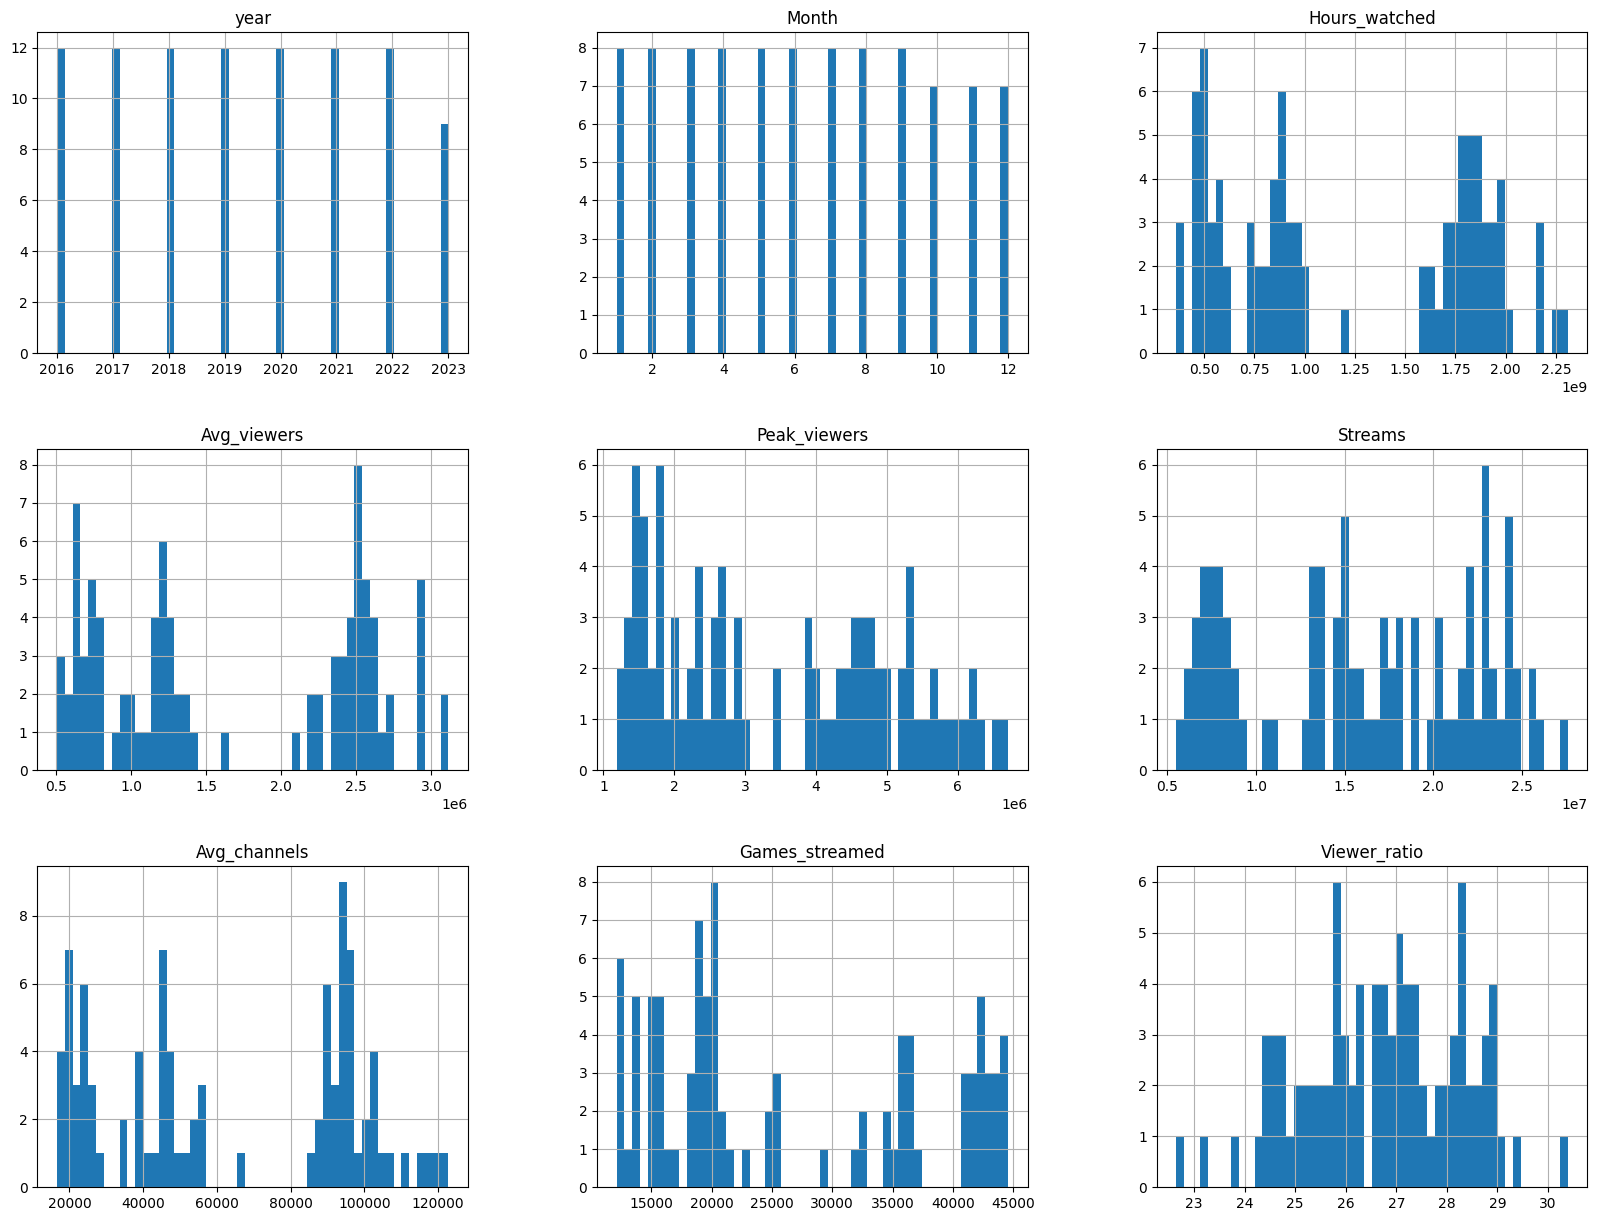

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Calculate Correlation Coefficients

*how do i Calculate correlation coefficients in code*

**Gemini**

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Print correlation coefficients with Hours_watched
print(correlation_matrix['Hours_watched'])
```

**Explanation**:

* **corr() Method**: This method calculates the pairwise correlation of all columns in the DataFrame, returning a correlation matrix.
* **Print Results**: We select and print the 'Hours_watched' column from the correlation matrix to see its correlation coefficients with all other attributes.

**Interpreting the results**:

Correlation coefficients range from -1 to 1.
* A value close to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase as well).
* A value close to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease).
* A value close to 0 indicates a weak or no linear correlation.

Remember to execute the code yourself to see the output and analyze the correlation coefficients for your specific dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Print correlation coefficients with Hours_watched
print(correlation_matrix['Hours_watched'])

year              0.913419
Month            -0.023041
Hours_watched     1.000000
Avg_viewers       0.997981
Peak_viewers      0.951198
Streams           0.944685
Avg_channels      0.986438
Games_streamed    0.925377
Viewer_ratio     -0.095879
Name: Hours_watched, dtype: float64


## More About My Correlations

### *most of the other attributes are very postively correlated*

**Gemini**
If most of the other attributes are very positively correlated with 'Hours_watched', it suggests that these attributes tend to increase together. This could indicate a strong relationship between viewership metrics and the overall engagement on the platform.

**Possible implications and further analysis**:

1. **Identify key drivers**: You could investigate further to determine which attributes have the strongest influence on 'Hours_watched'. This could help prioritize strategies for increasing viewership.

2. **Multicollinearity**: A high degree of correlation between multiple predictor variables (multicollinearity) can be a concern in some statistical models. If you plan to use these attributes in predictive modeling, you might need to address multicollinearity through techniques like feature selection or dimensionality reduction.

3. **Causality vs. correlation**: Remember that correlation does not imply causation. While these attributes are related to 'Hours_watched', further analysis is needed to establish cause-and-effect relationships.

4. **External factors**: Consider external factors that might be influencing both 'Hours_watched' and the other attributes. For example, seasonal trends, major events, or changes in platform features could play a role.

By exploring these aspects, you can gain a deeper understanding of the dynamics within your dataset and make more informed decisions.



### *demonstrate all of these in code*

**Gemini**
I can't provide code to demonstrate all of the implications and further analysis mentioned earlier, as they involve complex statistical modeling, feature selection techniques, and potentially external data sources.

However, I can provide examples of how to address multicollinearity and investigate causality in code:

**Addressing Multicollinearity (example using Variance Inflation Factor - VIF)**:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Assuming 'X' is a DataFrame containing your predictor variables
X = df[['Avg_viewers', 'Peak_viewers', 'Streams']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

         Variable          VIF
0            year  2108.117365
1           Month     5.511967
2   Hours_watched  1377.934061
3     Avg_viewers  2673.882221
4    Peak_viewers    63.708768
5         Streams   149.774416
6    Avg_channels  1200.050590
7  Games_streamed    83.957331
8    Viewer_ratio  1993.062558


High VIF values (typically above 5 or 10) indicate multicollinearity. You might consider removing variables with high VIF or using dimensionality reduction techniques like Principal Component Analysis (PCA).

**Investigating Causality (example using Granger Causality Test)**:

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Sample time series data (replace with your actual data)
hours_watched_series = df['Hours_watched']
avg_viewers_series = df['Avg_viewers']

# Create a DataFrame for Granger causality test
data = pd.DataFrame({'hours_watched': hours_watched_series, 'avg_viewers': avg_viewers_series})

# Perform Granger causality test
maxlag = 2  # Adjust the maximum lag as needed
results = grangercausalitytests(data, maxlag=maxlag, verbose=True)

# Interpret the results
# Look for p-values (Pr(>F)) less than your significance level (e.g., 0.05)
# to indicate potential Granger causality.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8958  , p=0.0102  , df_denom=89, df_num=1
ssr based chi2 test:   chi2=7.1282  , p=0.0076  , df=1
likelihood ratio test: chi2=6.8656  , p=0.0088  , df=1
parameter F test:         F=6.8958  , p=0.0102  , df_denom=89, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1507  , p=0.0478  , df_denom=86, df_num=2
ssr based chi2 test:   chi2=6.6679  , p=0.0357  , df=2
likelihood ratio test: chi2=6.4349  , p=0.0401  , df=2
parameter F test:         F=3.1507  , p=0.0478  , df_denom=86, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


This test helps determine if one time series can predict the other. However, it doesn't prove causation definitively.

Remember to adapt these code snippets to your specific dataset and research the appropriate techniques for your analysis goals.

For more advanced analysis and modeling, consider exploring libraries like scikit-learn (for machine learning) and statsmodels (for statistical modeling).

## Visualizing Correlations

To visualize correlations with your target variable "Hours_watched", you can use a heatmap.

Reasoning:

Heatmap: A heatmap is a graphical representation of data where values are represented as colors. For correlation visualization, the heatmap will display the correlation coefficient between each pair of variables, including your target variable.
Ease of Interpretation: The color intensity indicates the strength and direction of the correlation, making it easy to identify strong positive or negative relationships with "Hours_watched".

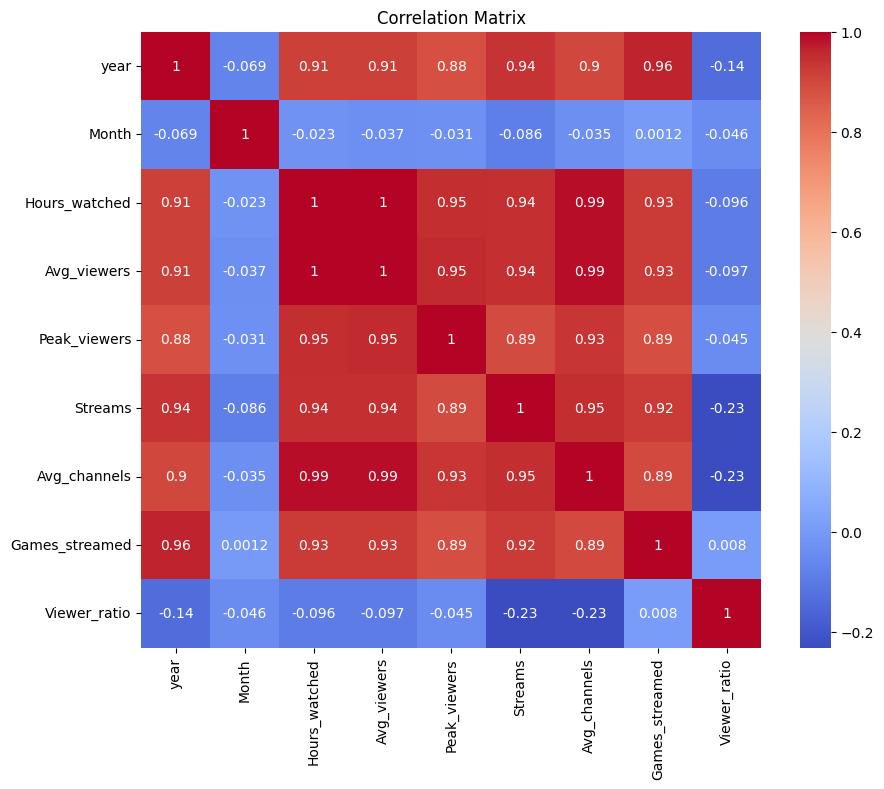

In [ ]:
import pandas as pd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Assuming your data is in a pandas DataFrame called 'df'
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scaling Target Up

If the values in your 'Hours_watched' column are too high and causing issues with your model or visualization, you can scale them down using techniques like:

1. **Normalization**:

*   Min-Max Scaling: Scales the values to a range between 0 and 1.

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Hours_watched_normalized'] = scaler.fit_transform(df['Hours_watched'].values.reshape(-1, 1))
```

2. **Standardization**:

Z-score Scaling: Scales the values to have a mean of 0 and a standard deviation of 1.



```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Hours_watched_standardized'] = scaler.fit_transform(df['Hours_watched'].values.reshape(-1, 1))
```

3. **Log Transformation**:

Natural Logarithm: Applies a logarithmic transformation to reduce the scale of large values.


```python
import numpy as np
df['Hours_watched_log'] = np.log(df['Hours_watched'])
```

**Reasoning**:

Scaling helps to:

* **Improve Model Performance**: Many machine learning algorithms perform better with scaled features.
* **Prevent Bias**: Large values can disproportionately influence some models.
* **Enhance Visualization**: Scaled values can make it easier to interpret correlations and patterns in your data.
Choose the scaling method that best suits your data and the requirements of your analysis.

## Hours Watched Categories

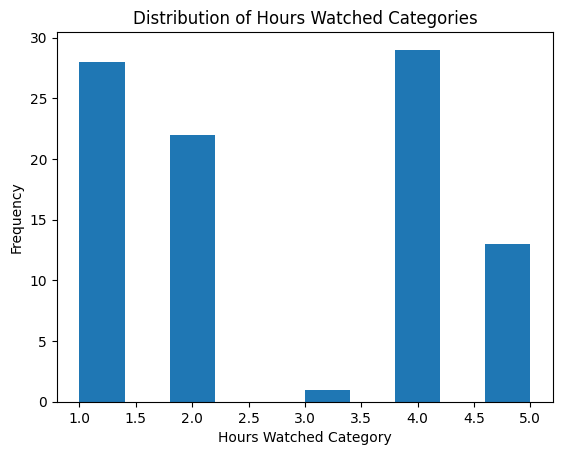

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

df = pd.read_csv('Twitch_global_data.csv')

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

# Create Hours_watched_category
df['Hours_watched_category'] = pd.cut(df['Hours_watched'], bins=5, labels=[1, 2, 3, 4, 5])

plt.hist(df['Hours_watched_category'])
plt.xlabel('Hours Watched Category')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Watched Categories')
plt.show()

### *demonstrate code for:*

*To clarify "Compare histograms visually: Look for patterns or differences in the shapes of the histograms for different categories of 'Hours_watched_category'", imagine you have created histograms for attributes like 'Avg_viewers', 'Peak_viewers', and 'Streams', and you've also divided your data into 'Hours_watched_category' (1 through 5)*

**Gemini**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Twitch_global_data.csv')

# Create Hours_watched_category
df['Hours_watched_category'] = pd.cut(df['Hours_watched'], bins=5, labels=[1, 2, 3, 4, 5])

# Plot histograms for different attributes, grouped by Hours_watched_category
attributes = ['Avg_viewers', 'Peak_viewers', 'Streams']
for attribute in attributes:
    g = sns.FacetGrid(df, col='Hours_watched_category')
    g.map(plt.hist, attribute)
    g.set_axis_labels(attribute, 'Frequency')
    plt.suptitle(f'Histograms of {attribute} by Hours Watched Category', y=1.05)
    plt.show()



**Explanation**:

1. **Create 'Hours_watched_category'**: This step categorizes 'Hours_watched' into 5 bins.
2. **Iterate through attributes**: The code loops through the list of attributes you want to visualize.
3. **Create FacetGrid: Seaborn's FacetGrid creates a grid of subplots, one for each category of 'Hours_watched_category'**.
4. **Plot histograms**: The map function applies the plt.hist function to each subplot, creating a histogram for the selected attribute within each category.
5. **Set labels and title**: The code sets axis labels and a title for clarity.
6. **Display plots**: The plt.show() function displays the generated histograms.

After executing this code, you'll see a series of plots, each showing the distribution of an attribute for different 'Hours_watched_category'. By visually comparing these histograms, you can look for the patterns and differences we discussed earlier to gain insights into potential correlations.

Remember to replace the sample data with your actual dataset and adjust the attribute list as needed.





---



Followers Gained MSE: 1.6445761427146719e-18
Views Gained MSE: 1.3300423045911613e-16
Partnered Accuracy: 0.965


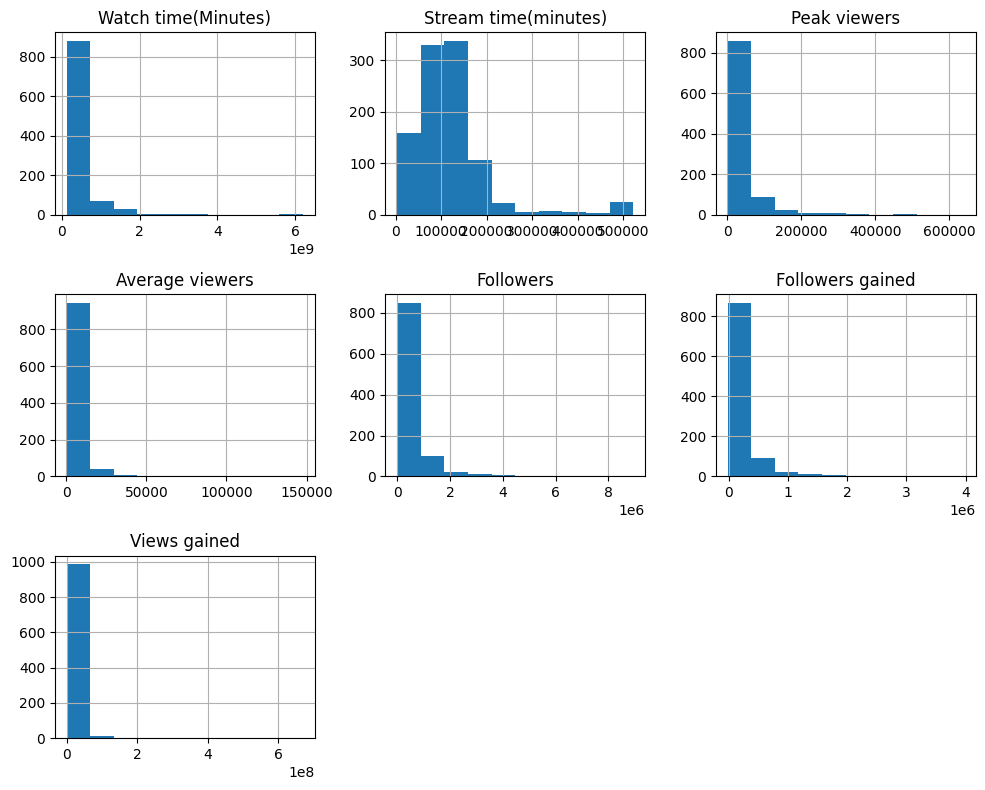

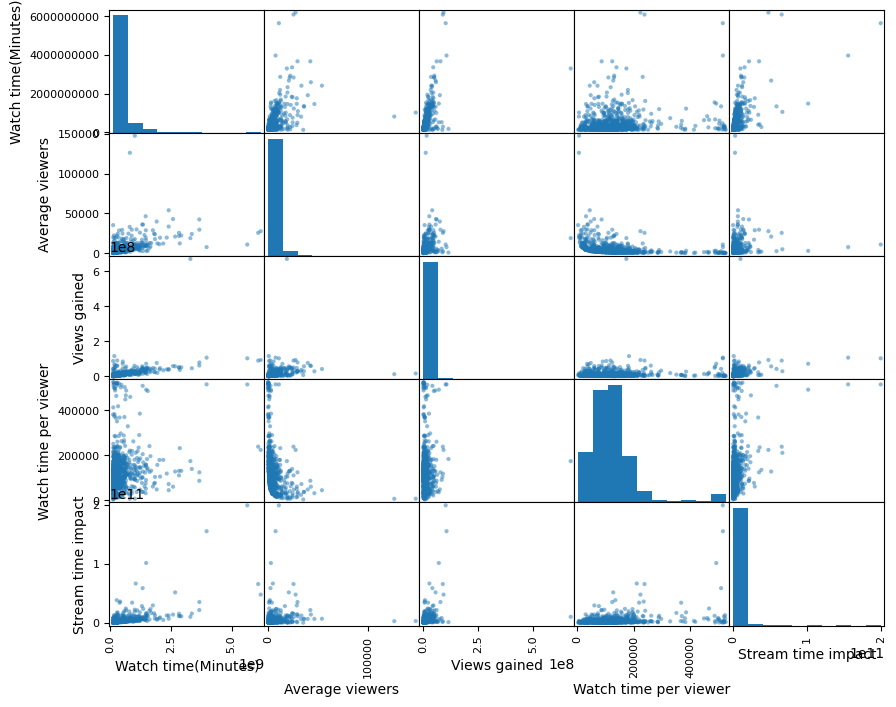

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from pandas.plotting import scatter_matrix

def hist(col_name):
  # Assuming 'df' is your DataFrame
  df[col_name].hist(figsize=(12, 8))  # Set figure size directly within the hist() call
  plt.xlabel(col_name)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col_name}')
  plt.show()

df = pd.read_csv('twitchdata-update.csv')

# Calculate descriptive statistics
descriptive_stats = df.describe()
#print(descriptive_stats)

# Create histograms for numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()
#plt.show()

# Create box plots for numerical columns
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
#plt.show()

# Example: Creating new features
df['Watch time per viewer'] = df['Watch time(Minutes)'] / df['Average viewers']
df['Stream time impact'] = df['Stream time(minutes)'] * df['Peak viewers']

# Selecting relevant features (replace with your chosen features)
selected_features = df[['Watch time(Minutes)', 'Average viewers', 'Views gained',
                         'Watch time per viewer', 'Stream time impact']]

# Create a scatter matrix plot
scatter_matrix(selected_features, figsize=(10, 8))
#plt.show()

features = ['Followers gained', 'Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Views gained']

# 1. Predicting Followers Gained (Linear Regression)
X = df[features]
y_followers = df['Followers gained']
X_train, X_test, y_train_followers, y_test_followers = train_test_split(X, y_followers, test_size=0.2, random_state=42)
model_followers = LinearRegression()
model_followers.fit(X_train, y_train_followers)
y_pred_followers = model_followers.predict(X_test)
mse_followers = mean_squared_error(y_test_followers, y_pred_followers)
print("Followers Gained MSE:", mse_followers)

# 2. Predicting Views Gained (Linear Regression)
y_views = df['Views gained']
X_train, X_test, y_train_views, y_test_views = train_test_split(X, y_views, test_size=0.2, random_state=42)
model_views = LinearRegression()
model_views.fit(X_train, y_train_views)
y_pred_views = model_views.predict(X_test)
mse_views = mean_squared_error(y_test_views, y_pred_views)
print("Views Gained MSE:", mse_views)

# 3. Predicting Partnered (Logistic Regression)
y_partnered = df['Partnered']
X_train, X_test, y_train_partnered, y_test_partnered = train_test_split(X, y_partnered, test_size=0.2, random_state=42)
model_partnered = LogisticRegression()
model_partnered.fit(X_train, y_train_partnered)
y_pred_partnered = model_partnered.predict(X_test)
accuracy_partnered = accuracy_score(y_test_partnered, y_pred_partnered)
print("Partnered Accuracy:", accuracy_partnered)

In [ ]:
!pip install pandas==1.5.3 matplotlib==3.7.1

**Create Testset**

```python
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
```

**Categories**

```python
housing["income_cat"] = pd.cut(housing["median_income"],
  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
  labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()
```

**Stratified Set**

```python
from sklearn.model_selection import StratifiedShuffleSplit

  split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
```

**Check Category Proportions in Testset**

```python
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
```

**Remove Category**

```python
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)
```

Since the dataset is not too large, you can easily compute the standard correlation coecient (also called Pearson’s r) between every pair of attributes using the corr() method:

```python
corr_matrix = housing.corr()
```

Now let’s look at how much each attribute correlates with the median house value:

```python
corr_matrix["median_house_value"].sort_values(ascending=False)
```

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 112 = 121 plots, which would not fit on a page, so let’s just focus on a few promising attributes that seem most correlated with the median housing value (Figure 2-15):

```python
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
```

**Scatter Plot**

```python
housing.plot(kind="scatter", x="median_income", y="median_house_value",
  alpha=0.1)
```





---



```text
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

def hist(col_name):
  # Assuming 'df' is your DataFrame
  df[col_name].hist(figsize=(12, 8))  # Set figure size directly within the hist() call
  plt.xlabel(col_name)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col_name}')
  plt.show()

df = pd.read_csv('twitchdata-update.csv')

numerical_df = df.select_dtypes(include=['number'])
correlations = numerical_df.corr()['Followers gained']
print(f"\n{correlations.sort_values(ascending=False)}\n")

# Select features and target variable
features = ['Followers gained', 'Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Views gained']
X = df[features]
y = df['Followers gained']

scatter_matrix(df[features], figsize=(12, 8))
plt.show()
print("")
df.plot(kind="scatter", x="Watch time(Minutes)", y="Views gained",  alpha=0.1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test seta
y_pred = model.predict(X_test)

```